In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv( r"C:\Users\LENOVO\data_houseprice1.csv",names = ["serial","date","age","distance","stores","latitude","longitude","price"])

In [3]:
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [4]:
df.describe()

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,1443.520003,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,0.000000,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,1249.750000,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2499.500000,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,3749.250000,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,4999.000000,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   serial     5000 non-null   int64
 1   date       5000 non-null   int64
 2   age        5000 non-null   int64
 3   distance   5000 non-null   int64
 4   stores     5000 non-null   int64
 5   latitude   5000 non-null   int64
 6   longitude  5000 non-null   int64
 7   price      5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


In [6]:
df.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [7]:
df.groupby("date")["date"].count()

date
2000    265
2001    265
2002    275
2003    268
2004    269
2005    258
2006    272
2007    274
2008    264
2009    241
2010    251
2011    285
2012    268
2013    270
2014    244
2015    266
2016    272
2017    255
2018    238
Name: date, dtype: int64

In [8]:
from sklearn import preprocessing

In [9]:
df1 = df.drop(['price'],axis=1)

In [10]:
df1.head()

,serial,date,age,distance,stores,latitude,longitude
0,0,2009,21,9,6,84,121
1,1,2007,4,2,3,86,121
2,2,2016,18,3,7,90,120
3,3,2002,13,2,2,80,128
4,4,2014,25,5,8,81,122


In [11]:
standardscaler=preprocessing.StandardScaler()
df1_scaled=standardscaler.fit_transform(df1)
df1_scaled

array([[-1.73170443,  0.01597938,  0.1814024 , ...,  0.34525831,
        -0.30724231, -1.26092472],
       [-1.73101161, -0.35052022, -1.31925007, ..., -0.60937297,
         0.32533399, -1.26092472],
       [-1.73031879,  1.298728  , -0.08341862, ...,  0.66346874,
         1.59048659, -1.57661365],
       ...,
       [ 1.73031879,  1.4819778 , -1.14270272, ...,  0.02704789,
         1.59048659,  0.001831  ],
       [ 1.73101161,  0.19922919,  1.5937812 , ...,  0.02704789,
        -1.25610676,  0.94889778],
       [ 1.73170443,  1.6652276 , -0.8778817 , ...,  1.2998896 ,
         1.59048659,  0.63320885]])

In [12]:
df.price

0       14264
1       12032
2       13560
3       12029
4       14157
        ...  
4995    13539
4996    14757
4997    14102
4998    14313
4999    12770
Name: price, Length: 5000, dtype: int64

In [13]:
price=pd.DataFrame(df['price'],columns=['price'])
price

,price
0,14264
1,12032
2,13560
3,12029
4,14157
...,...
4995,13539
4996,14757
4997,14102
4998,14313


In [14]:
standardscaler=preprocessing.StandardScaler()
price_scaled=standardscaler.fit_transform(price)
price_scaled

array([[ 0.35012337],
       [-1.83666951],
       [-0.33961775],
       ...,
       [ 0.19140453],
       [ 0.39813092],
       [-1.11361702]])

In [15]:
df2=pd.concat([df1,price],axis=1)
df2

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...,...
4995,4995,2007,17,6,3,90,125,13539
4996,4996,2016,7,10,0,85,129,14757
4997,4997,2017,6,10,5,90,125,14102
4998,4998,2010,37,3,5,81,128,14313


In [16]:
df2.describe().round(decimals=2)

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2499.50,2008.91,18.94,4.98,4.92,84.97,124.99,13906.64
std,1443.52,5.46,11.33,3.20,3.14,3.16,3.17,1020.77
min,0.00,2000.00,0.00,0.00,0.00,80.00,120.00,11263.00
25%,1249.75,2004.00,9.00,2.00,2.00,82.00,122.00,13197.75
50%,2499.50,2009.00,19.00,5.00,5.00,85.00,125.00,13893.50
75%,3749.25,2014.00,29.00,8.00,8.00,88.00,128.00,14614.00
max,4999.00,2018.00,38.00,10.00,10.00,90.00,130.00,16964.00


In [17]:
corr=df2.corr('pearson')
corrs=[abs(corr[attr]['price'])for attr in list(df1)]
l=list(zip(corrs,list(df1)))
l.sort(key=lambda x : x[0], reverse=True)
corrs, labels=list(zip((*l)))

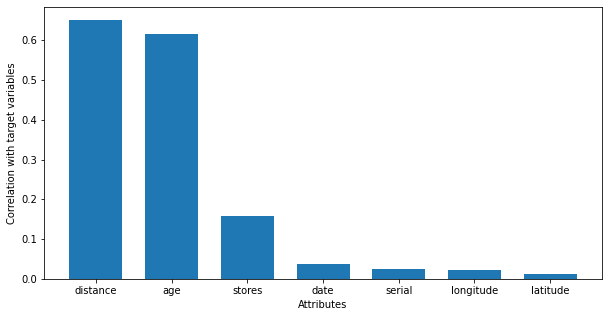

In [18]:
index = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.bar(index,corrs,width=0.7)
plt.xlabel('Attributes')
plt.ylabel('Correlation with target variables')
plt.xticks(index,labels)
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
X=df2['distance'].values
Y=df2['price'].values
Y[:5]

array([14264, 12032, 13560, 12029, 14157], dtype=int64)

In [21]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [22]:
Y[:5]

array([0.52639888, 0.13488862, 0.40291177, 0.13436239, 0.50763024])

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest,ytrain,ytest =train_test_split(X, Y, test_size=0.2)
xtrain=xtrain.reshape(-1,1)
ytrain=ytrain.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [27]:
lm.coef_

array([[0.36148122]])

In [28]:
predictions = lm.predict(xtest)

Text(0, 0.5, 'Predictions')

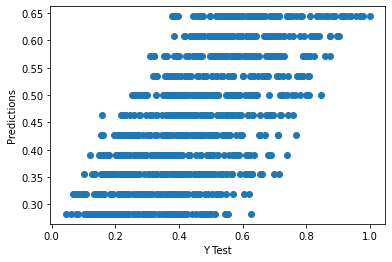

In [29]:
plt.scatter(ytest,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [30]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(ytest,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(ytest,predictions)))

MSE:  0.01965972668450217
RMSE:  0.14021314733113358


In [31]:
p=pd.DataFrame(list(zip(xtest,ytest,predictions)),columns=['x','price_y','predictions'])
p

,x,price_y,predictions
0,[0.5],[0.39659708823013484],[0.46346096774791556]
1,[0.0],[0.0442027714436064],[0.28272035960450304]
2,[1.0],[0.47272408349412376],[0.6442015758913281]
3,[1.0],[0.6616383090685847],[0.6442015758913281]
4,[0.5],[0.5944571127872302],[0.46346096774791556]
...,...,...,...
995,[0.4],[0.5113138045956849],[0.42731284611923304]
996,[0.30000000000000004],[0.38800210489387843],[0.39116472449055056]
997,[0.4],[0.30626205928784445],[0.42731284611923304]
998,[1.0],[0.7082967900368355],[0.6442015758913281]


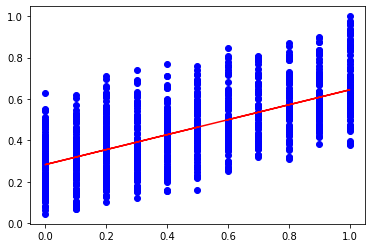

In [32]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predictions,color='r')

In [33]:
predictions=predictions.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)
xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predictions_scaled=y_scaler.inverse_transform(predictions)
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predictions_scaled=predictions_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled, ytest_scaled,predictions_scaled)),columns=['x','target_y','predictions'])
p=p.round(decimals=2)
p

,x,target_y,predictions
0,5.0,13524.0,13905.19
1,0.0,11515.0,12874.79
2,10.0,13958.0,14935.59
3,10.0,15035.0,14935.59
4,5.0,14652.0,13905.19
...,...,...,...
995,4.0,14178.0,13699.11
996,3.0,13475.0,13493.03
997,4.0,13009.0,13699.11
998,10.0,15301.0,14935.59
